In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
#Import data
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d.csv",header=0, index_col='Datetime')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d.csv")



In [19]:
# Filtrar os dados até 31/03/2021
data = data[data['Datetime'] <= '2021-03-31']

# Realizar a diferenciação na coluna 'Close'
data['Close_diff'] = data['Close'].diff()

# Remover a primeira linha que terá um valor NaN após a diferenciação
data = data.dropna()

# Salvar os dados transformados em um novo arquivo CSV
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d_transformed.csv', index=False)


<ipython-input-19-a4965e2515a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close_diff'] = data['Close'].diff()


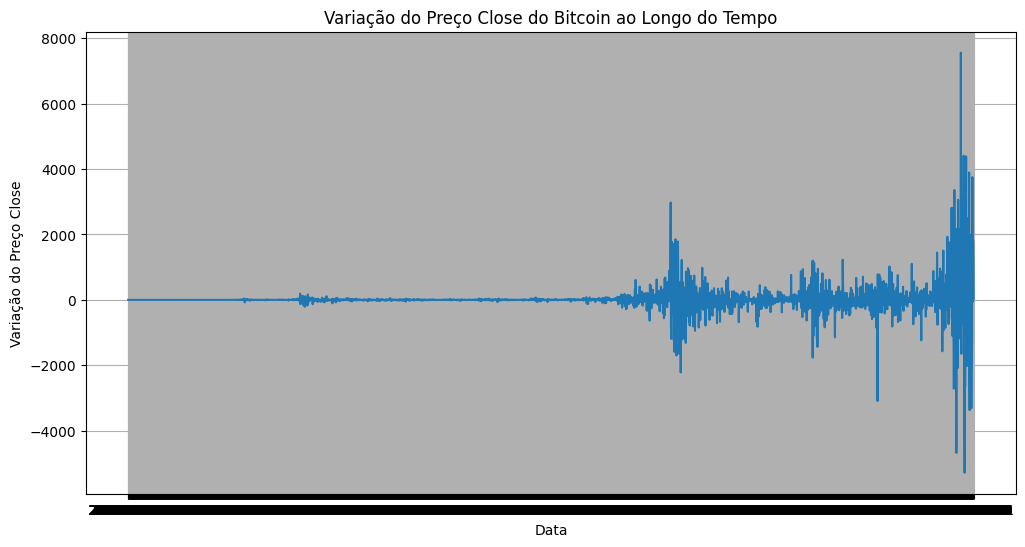

In [20]:

# Plotar a variação do preço Close ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['Close_diff'])
plt.xlabel('Data')
plt.ylabel('Variação do Preço Close')
plt.title('Variação do Preço Close do Bitcoin ao Longo do Tempo')
plt.grid(True)

# Exibir o gráfico
plt.show()

In [24]:
# Ajuste polinomial de grau n
n = 2  # Grau do polinômio
# Filtrar os dados até 31/03/2021
data = data[data['Datetime'] <= '2021-03-31']

coefficients = np.polyfit(range(len(data)), data['Close'], n)
polynomial = np.poly1d(coefficients)
data_polynomial = polynomial(range(len(data)))

# Salvar os dados ajustados em um novo arquivo CSV
data['Close_adjusted'] = data_polynomial
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d_adjusted.csv', index=False)

<ipython-input-24-4f865c736f98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close_adjusted'] = data_polynomial


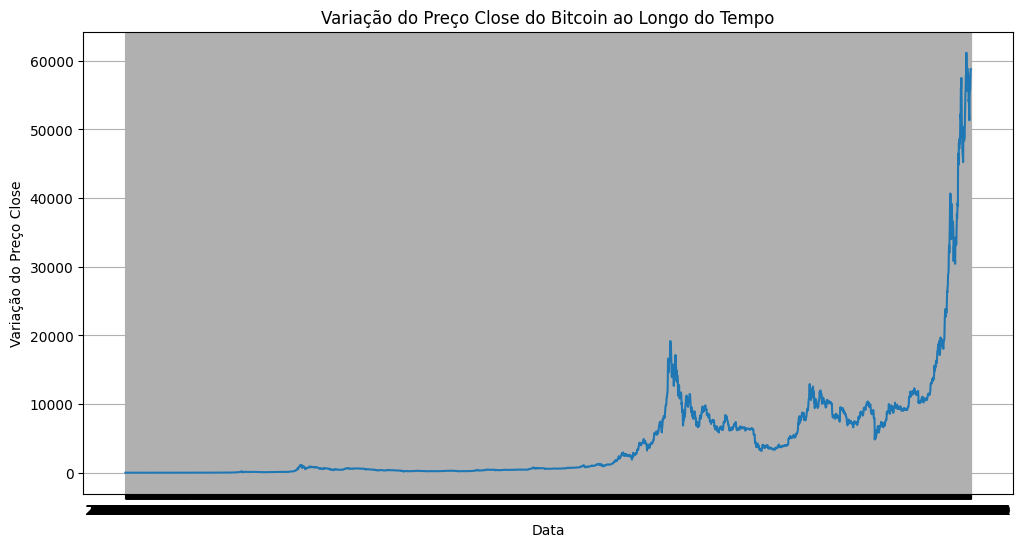

In [25]:
# Plotar a variação do preço Close ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['Close'])
plt.xlabel('Data')
plt.ylabel('Variação do Preço Close')
plt.title('Variação do Preço Close do Bitcoin ao Longo do Tempo')
plt.grid(True)

# Exibir o gráfico
plt.show()

In [31]:
# Realizar a suavização usando médias móveis com uma janela de tamanho n
n = 7  # Tamanho da janela
data_smoothed = data['Close'].rolling(window=n).mean()

# Salvar os dados suavizados em um novo arquivo CSV
data['Close_smoothed'] = data_smoothed
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d_smoothed.csv', index=False)

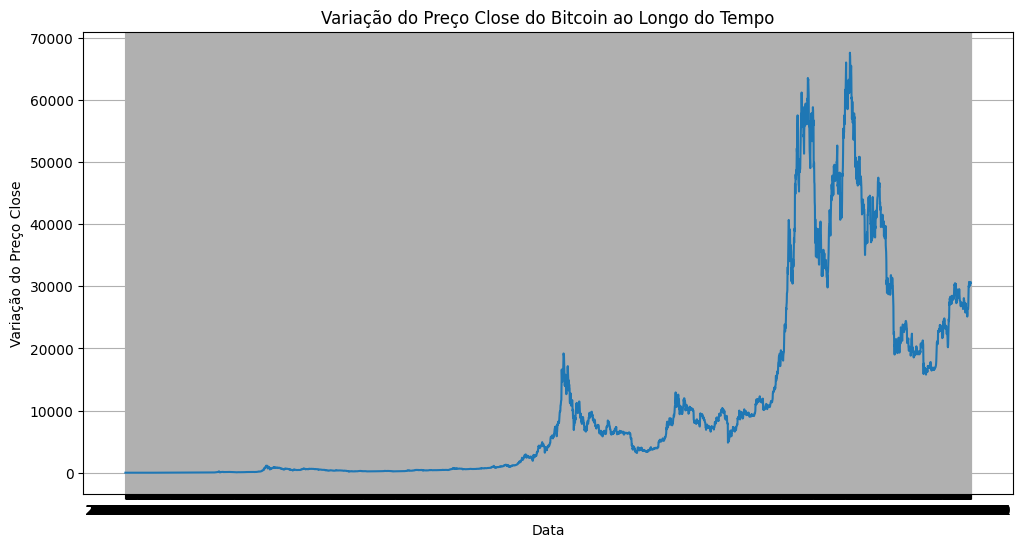

In [32]:
# Plotar a variação do preço Close ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['Close'])
plt.xlabel('Data')
plt.ylabel('Variação do Preço Close')
plt.title('Variação do Preço Close do Bitcoin ao Longo do Tempo')
plt.grid(True)

# Exibir o gráfico
plt.show()

In [54]:
#todos os métodos
#Converter a coluna 'Datetime' para o tipo datetime
data = data[data['Datetime'] <= '2020-12-31']
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Diferenciação
data['Close_diff'] = data['Close'].diff()

# Agregação - médias mensais
data_monthly = data.resample('M', on='Datetime').mean()

# Suavização - médias móveis com janela de 7 dias
data['Close_smooth'] = data['Close'].rolling(window=7).mean()

# Ajuste polinomial - regressão polinomial de grau 2
x = range(len(data))
coefficients = np.polyfit(x, data['Close'], 2)
data['Close_polyfit'] = np.polyval(coefficients, x)

# Salvar os dados alterados em um arquivo CSV
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d_transformed_all.csv', index=False)

<ipython-input-54-d6d99a7de981>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Datetime'] = pd.to_datetime(data['Datetime'])
<ipython-input-54-d6d99a7de981>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close_diff'] = data['Close'].diff()
<ipython-input-54-d6d99a7de981>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

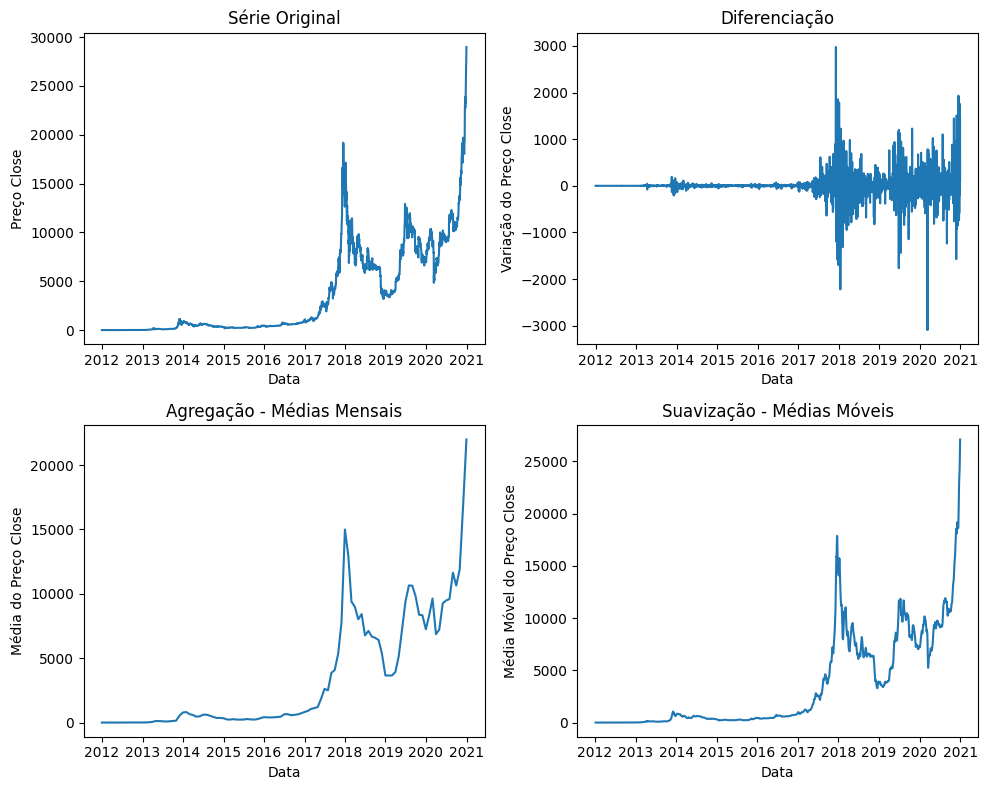

In [55]:

# Plotar os resultados
plt.figure(figsize=(10, 8))

# Série original
plt.subplot(2, 2, 1)
plt.plot(data['Datetime'], data['Close'])
plt.title('Série Original')
plt.xlabel('Data')
plt.ylabel('Preço Close')

# Diferenciação
plt.subplot(2, 2, 2)
plt.plot(data['Datetime'][1:], data['Close_diff'][1:])
plt.title('Diferenciação')
plt.xlabel('Data')
plt.ylabel('Variação do Preço Close')

# Agregação - médias mensais
plt.subplot(2, 2, 3)
plt.plot(data_monthly.index, data_monthly['Close'])
plt.title('Agregação - Médias Mensais')
plt.xlabel('Data')
plt.ylabel('Média do Preço Close')

# Suavização - médias móveis
plt.subplot(2, 2, 4)
plt.plot(data['Datetime'], data['Close_smooth'])
plt.title('Suavização - Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Média Móvel do Preço Close')

# Exibir os gráficos
plt.tight_layout()
plt.show()

In [56]:
# Carregar o conjunto de dados
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d_transformed_all.csv')

# Selecionar a coluna 'Close'
close_data = data['Close']

In [57]:
# Executar o teste de Dickey-Fuller Aumentado (ADF)
result = adfuller(close_data)

# Extrair as estatísticas do teste
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Imprimir o resultado do teste
alpha = 0.05  # Nível de significância

print("Resultado do Teste de Dickey-Fuller Aumentado (ADF):")
print("Estatística ADF:", adf_statistic)
print("Valor-p:", p_value)
print("Valores críticos:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

if adf_statistic < critical_values['5%']:
    print("Rejeitar a hipótese nula. A série é estacionária.")
else:
    print("Não há evidências para rejeitar a hipótese nula. A série não é estacionária.")

Resultado do Teste de Dickey-Fuller Aumentado (ADF):
Estatística ADF: 2.0291051416132566
Valor-p: 0.9987095971785417
Valores críticos:
1%: -3.4323581184837426
5%: -2.862427266935068
10%: -2.5672423111140947
Não há evidências para rejeitar a hipótese nula. A série não é estacionária.


In [58]:
import pandas as pd
import numpy as np

def hurst(series):
    """Calcula o coeficiente de Hurst usando o método da Variância Agregada."""
    # Calcula a diferença dos logaritmos dos preços
    log_returns = np.log(series).diff().dropna()
    n = len(log_returns)

    # Calcula as faixas de janela
    window_sizes = 2 ** np.arange(2, 10)

    # Calcula a variância agregada para cada tamanho de janela
    variances = []
    for window in window_sizes:
        # Divide a série em subseries sobrepostas
        subseries = np.array_split(log_returns, window)

        # Calcula a variação para cada subserie
        sub_variances = []
        for subset in subseries:
            range_ = np.ptp(subset)
            sub_variances.append(np.var(subset))

        # Calcula a média das variações para a janela atual
        variances.append(np.mean(sub_variances))

    # Ajusta a escala dos tamanhos de janela e das variâncias
    log_variances = np.log(variances)
    log_sizes = np.log(window_sizes)

    # Calcula o coeficiente de Hurst usando regressão linear
    hurst_exponent = np.polyfit(log_sizes, log_variances, 1)[0]

    return hurst_exponent

In [59]:
# Carrega os dados do arquivo CSV
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d_transformed_all.csv')

# Seleciona a coluna "Close" como a série temporal para análise
series = data['Close']

# Calcula o coeficiente de Hurst
hurst_coefficient = hurst(series)

print("Coeficiente de Hurst:", hurst_coefficient)

Coeficiente de Hurst: -0.031028559699539406


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def hurst(series):
    """Calcula o coeficiente de Hurst usando o método da Variância Agregada."""
    # Calcula a diferença dos logaritmos dos preços
    log_returns = np.log(series).diff().dropna()
    n = len(log_returns)

    # Calcula as faixas de janela
    window_sizes = 2 ** np.arange(2, 10)

    # Calcula a variância agregada para cada tamanho de janela
    variances = []
    for window in window_sizes:
        # Divide a série em subseries sobrepostas
        subseries = np.array_split(log_returns, window)

        # Calcula a variação para cada subserie
        sub_variances = []
        for subset in subseries:
            range_ = np.ptp(subset)
            sub_variances.append(np.var(subset))

        # Calcula a média das variações para a janela atual
        variances.append(np.mean(sub_variances))

    # Ajusta a escala dos tamanhos de janela e das variâncias
    log_variances = np.log(variances)
    log_sizes = np.log(window_sizes)

    # Calcula o coeficiente de Hurst usando regressão linear
    hurst_exponent = np.polyfit(log_sizes, log_variances, 1)[0]

    return hurst_exponent


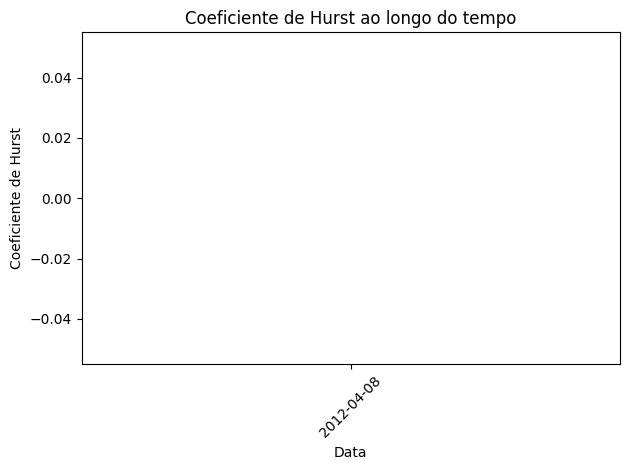

In [61]:

# Carrega os dados do arquivo CSV
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d_transformed_all.csv')

# Seleciona a coluna "Close" como a série temporal para análise
series = data['Close']

# Define o tamanho da janela deslizante
window_size = 100

# Calcula o coeficiente de Hurst em janelas deslizantes
hurst_values = []
for i in range(len(series) - window_size + 1):
    window = series[i : i + window_size]
    hurst_coefficient = hurst(window)
    hurst_values.append(hurst_coefficient)

# Cria um array de datas correspondentes às janelas deslizantes
dates = data['Datetime'][window_size - 1 :]

# Plota o gráfico do coeficiente de Hurst ao longo do tempo
plt.plot(dates, hurst_values)
plt.title('Coeficiente de Hurst ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Coeficiente de Hurst')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()